# Twitter Exploration

As a potential Data Analysis project I explored the publically available Tweeter API and what data can be easily accessed with it. I used the Tweepy library to wrap the Twitter API. I initially created a number of methods in Twitter_Access.py to exercise the search, home_timeline and user_timeline API methods and save the resulting data into .csv files for analysis with pandas.

In [13]:
import pandas as pd
import os
from datetime import datetime 
from Twitter_Access import get_twitter_api_obj
from Twitter_Access import get_users_timeline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown, display, HTML

cwd = os.getcwd()
print(cwd)

/Users/alisonkline/Code/TwitterExploration


I manually collected the twitter screen_names for some of the key democrate and republican twitter accounts.

Here they are:

Republican

| Twitter Screen Name | Description of account |
|---------------------|------------------------|
| @GOP | The Grand Old Party, aka The Republicans |
| @NRCC | The Republican Congressional Committee |
| @HouseGOP | The House Republicans |
| @SenateGOP | The Senate Republicans |

Democrate

| Twitter Screen Name | Description of account |
|---------------------|------------------------|
| @TheDemocrats | The Democrats |
| @DNC | The Democratic National Committee |
| @HouseDemocrats | The House Democrats |
| @SenateDemocrats | The Senate Democrats |

Then ran the user time_line method created in Twitter_Access.py on each account in turn to gather their tweet data.

So far only @GOP and @TheDemocrats

I need to create an API object first to handle the actual Twitter API authentication. This loads in the account keys I created and are linked to my private personal account. You can exchange them for your own by passing in a dictionary containing your values for 'consumer_key', 'consumer_secret', 'access_token', 'access_token_secret'.

In [2]:
api = get_twitter_api_obj()

In [3]:
#get_users_timeline(api, "TheDemocrats")

Obtained 1 tweet pages for user TheDemocrats.
Obtained 2 tweet pages for user TheDemocrats.
Obtained 3 tweet pages for user TheDemocrats.
Obtained 4 tweet pages for user TheDemocrats.
Obtained 5 tweet pages for user TheDemocrats.
Obtained 6 tweet pages for user TheDemocrats.
Obtained 7 tweet pages for user TheDemocrats.
Obtained 8 tweet pages for user TheDemocrats.
Obtained 9 tweet pages for user TheDemocrats.
Obtained 10 tweet pages for user TheDemocrats.
Obtained 11 tweet pages for user TheDemocrats.
Obtained 12 tweet pages for user TheDemocrats.
Obtained 13 tweet pages for user TheDemocrats.
Obtained 14 tweet pages for user TheDemocrats.
Obtained 15 tweet pages for user TheDemocrats.
Obtained 16 tweet pages for user TheDemocrats.


# Analysing the data

Initially just the two users @GOP and @TheDemocrats
The dumped .csv files are available in the Data directory so the first task is to import the data into two Pandas Dataframes.

In [2]:
rep = pd.read_csv(cwd+'/data/tweetsTimelineGOP.csv')
dem = pd.read_csv(cwd+'/data/tweetsTimelineTheDemocrats.csv')

In [3]:
def explore_columns(df1, df2):
    print('There are {} columns in both data sets :'.format(rep.shape[1]))
    for c in df1.columns.values:
        if c in df2.columns.values:
            print('   ' + c)
        else:
            print('Column ({}) only present in one dataset'.format(c))

explore_columns(rep, dem)

There are 12 columns in both data sets :
   id_str
   user.screen_name
   in_reply_to_screen_name
   created_at
   favorite_count
   quote_count
   reply_count
   retweet_count
   truncated
   lang
   text
   from


In [4]:
print('Total number of Republican tweets {} vs Democrat tweets {}'.format(rep.shape[0], dem.shape[0]))

Total number of Republican tweets 2507 vs Democrat tweets 2675


This includes all tweets in the data set, the 'from' field captures if a tweet was 'retweeted' or 'quoted' from another user.

In [5]:
print("Republican tweets - 'regular' are all those they authored, inc quoted and retweeted ones")
print(rep.groupby('from').size())
print("Democrat tweets - 'regular' are all those they authored, inc quoted and retweeted ones")
print(dem.groupby('from').size())

Republican tweets - 'regular' are all those they authored, inc quoted and retweeted ones
from
from_quoted_status        118
from_retweeted_status      52
regular                  2337
dtype: int64
Democrat tweets - 'regular' are all those they authored, inc quoted and retweeted ones
from
from_quoted_status        190
from_retweeted_status      59
regular                  2426
dtype: int64


Giving a quick look at the top 5 entries in both data sets:

In [6]:
rep.head(5)

,id_str,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,quote_count,reply_count,retweet_count,truncated,lang,text,from
0,996453465386823680,GOP,NaN,2018-05-15 18:13:14,746,0,0,261,False,en,"Today, @realDonaldTrump invited the family of ...",regular
1,996443844957917184,GOP,NaN,2018-05-15 17:35:00,0,0,0,21,False,en,RT @RNCData: Our next Campaign Data College is...,regular
2,996387031474429952,RNCData,NaN,2018-05-15 13:49:14,47,0,0,21,False,en,Our next Campaign Data College is June 18-20 i...,from_retweeted_status
3,996426767551356928,GOP,NaN,2018-05-15 16:27:08,0,0,0,55,False,en,RT @GOPChairwoman: So proud of our community l...,regular
4,996417420565929984,GOPChairwoman,NaN,2018-05-15 15:50:00,155,0,0,55,False,en,So proud of our community leaders across Ameri...,from_retweeted_status


In [7]:
dem.head(5)

,id_str,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,quote_count,reply_count,retweet_count,truncated,lang,text,from
0,996470547415486464,TheDemocrats,NaN,2018-05-15 19:21:06,0,0,0,21,False,en,RT @NebraskaDems: Polls open TODAY 8am-8pm CT....,regular
1,996361759551315968,NebraskaDems,NaN,2018-05-15 12:08:49,32,0,0,21,False,en,Polls open TODAY 8am-8pm CT.\nFind your pollin...,from_retweeted_status
2,996456438913527808,TheDemocrats,NaN,2018-05-15 18:25:02,0,0,0,70,False,en,RT @PADems: Polls are OPEN! Make sure you vote...,regular
3,996344440989011975,PADems,NaN,2018-05-15 11:00:00,81,0,0,70,False,en,Polls are OPEN! Make sure you vote for @Wolffo...,from_retweeted_status
4,996156902139719681,TheDemocrats,NaN,2018-05-14 22:34:47,547,0,0,292,False,en,"Thanks to Republicans, American jobs are movin...",regular


Neither data set should have many or any non-english tweets - but lets check:

In [6]:
str = 'Number of tweets in english : {0} from a total of {1} tweets so {2} foreign language tweets'
rep_en = rep['lang'].str.contains('en').value_counts()[True]
dem_en = dem['lang'].str.contains('en').value_counts()[True]
print(str.format(rep_en, rep.shape[0], rep.shape[0]-rep_en))
print(str.format(dem_en, dem.shape[0], dem.shape[0]-dem_en))

Number of tweets in english : 2505 from a total of 2507 tweets so 2 foreign language tweets
Number of tweets in english : 2674 from a total of 2675 tweets so 1 foreign language tweets


And looking at those tweets - they are authored by others. (und is undetected language)

In [7]:
print('Republican non english tweets')
display(rep.loc[~rep['lang'].str.contains('en'), ['lang', 'user.screen_name', 'from']])
print('Democrate non english tweets')
display(dem.loc[~dem['lang'].str.contains('en'), ['lang', 'user.screen_name', 'from']])

Republican non english tweets


,lang,user.screen_name,from
1939,und,POTUS,from_quoted_status
2124,und,netanyahu,from_quoted_status


Democrate non english tweets


,lang,user.screen_name,from
630,ro,MinnesotaDFL,from_quoted_status


Lets see how many tweets were retweets and display any that were created by users that are not our two accounts of interest:

**** RETWEET & QUOTED status **** 
retweets and quoted now correctly captured, 'from' field needs to be enhanced to make it easy to id and process out retweeted or quoted tweets, using from as it is not can ensure no double counting
also need to be able to easily find which tweet was the retweet - ie keeps the pairs together - although idx in the df may be enough

meaning on retweet flag given text "RT @CTDems: .@MayorMark won't stand up for our..." 4th from top - https://stackoverflow.com/questions/18869688/twitter-api-check-if-a-tweet-is-a-retweet
Retweeting: the old way was to add 'RT @' to the tweet but now their is a new formal Twitter API Retweet, the 'retweeted_status' appears only if retweeted and contains the original , 

In [7]:
print('Republicans have retweeted {} times'.format(len(rep[rep['from']=='from_retweeted_status']['retweeted'])))
print('Democrats have retweeted {} times'.format(len(dem[dem['retweeted']==True]['retweeted'])))

Republicans have retweeted 0 times
Democrats have retweeted 0 times


In [11]:
rep[rep['user.screen_name'] != 'GOP']

,id,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,favorited,retweet_count,retweeted,truncated,lang,text


In [12]:
dem[dem['user.screen_name'] != 'TheDemocrats']

,id,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,favorited,retweet_count,retweeted,truncated,lang,text


As we would expect there are no tweets created by someone else as there are no tweets in either account that have the 'retweeted' flag set to True.

Now lets look at the in_reply_to_screen_name column: Have either party answered someone's tweets and if so who?

In [8]:
#len(rep.loc[rep['in_reply_to_screen_name'].notnull(),['in_reply_to_screen_name','text']])
#len(dem.loc[dem['in_reply_to_screen_name'].notnull(),['in_reply_to_screen_name','text']])

drep = rep.loc[rep['from'].str.contains('regular'),:]     # only analysing target accounts direct tweets
ddem = dem.loc[dem['from'].str.contains('regular'),:]

print(drep.in_reply_to_screen_name.value_counts())
print('Total tweets in response to someone: {} \n'.format(len(drep[drep['in_reply_to_screen_name'].notnull()])))
print(ddem.in_reply_to_screen_name.value_counts())
print('Total tweets in response to someone: {}'.format(len(ddem[ddem['in_reply_to_screen_name'].notnull()])))

GOP                41
realDonaldTrump     1
POTUS               1
Name: in_reply_to_screen_name, dtype: int64
Total tweets in response to someone: 43 

TheDemocrats    76
keithellison     1
Name: in_reply_to_screen_name, dtype: int64
Total tweets in response to someone: 77


Its interesting to note that by far the most common reply for both parties is replying to their own tweet, likely in an effort drive its interest and reach - Time to start looking at likes and favorites and maybe see if these relate to which tweets got responded too!

In [9]:
print("The tweet with the smallest number of favorites has {} favorites for the Democrats and {} for Republicans.".format(min(ddem['favorite_count']), min(drep['favorite_count'])))
print("In fact the Democrats have {} tweets with 0 favorites and the Republicans have {}.".format(len(ddem[ddem['favorite_count'] == 0]),len(drep[drep['favorite_count'] == 0])))

display(Markdown('**5 of the Republican direct tweets with smallest favorite_count :**'))
display(drep.nsmallest(5,['favorite_count'])[['created_at', 'user.screen_name', 'favorite_count', 'retweet_count', 'truncated', 'text']])
display(Markdown('**5 Republican tweets with largest favorite_count :**'))
display(drep.nlargest(5,['favorite_count'])[['created_at', 'user.screen_name', 'favorite_count', 'retweet_count', 'truncated', 'text']])

display(Markdown('**5 of the Democrat direct tweets with smallest favorite_count :**'))
display(ddem.nsmallest(5,['favorite_count'])[['created_at', 'user.screen_name', 'favorite_count', 'retweet_count', 'truncated', 'text']])
display(Markdown('**5 Democrat tweets with largest favorite_count :**'))
display(ddem.nlargest(5,['favorite_count'])[['created_at','user.screen_name', 'favorite_count', 'retweet_count', 'truncated', 'text']])

The tweet with the smallest number of favorites has 0 favorites for the Democrats and 0 for Republicans.
In fact the Democrats have 59 tweets with 0 favorites and the Republicans have 52.


**5 of the Republican direct tweets with smallest favorite_count :**

,created_at,user.screen_name,favorite_count,retweet_count,truncated,text
1,2018-05-15 17:35:00,GOP,0,21,False,RT @RNCData: Our next Campaign Data College is...
3,2018-05-15 16:27:08,GOP,0,55,False,RT @GOPChairwoman: So proud of our community l...
6,2018-05-15 16:04:00,GOP,0,14335,False,RT @realDonaldTrump: Our great First Lady is d...
10,2018-05-14 22:40:00,GOP,0,2107,False,RT @IvankaTrump: Thank you Prime Minister @net...
12,2018-05-14 21:52:00,GOP,0,205,False,RT @GOPChairwoman: Praying for a swift recover...


**5 Republican tweets with largest favorite_count :**

,created_at,user.screen_name,favorite_count,retweet_count,truncated,text
289,2018-04-15 21:02:31,GOP,26555,5077,False,Our entire RNC family offers prayers of comfor...
1700,2017-08-30 21:22:56,GOP,26090,7497,False,".@POTUS: I want to work with Congress, Republi..."
1679,2017-09-06 19:55:02,GOP,21914,5090,False,.@IvankaTrump: This administration is committe...
2468,2017-01-20 22:36:08,GOP,21025,5887,False,Congratulations to our newest Secretary of Def...
953,2018-01-09 01:40:54,GOP,18673,5061,False,"Oh, say does that star-spangled banner yet wav..."


**5 of the Democrat direct tweets with smallest favorite_count :**

,created_at,user.screen_name,favorite_count,retweet_count,truncated,text
0,2018-05-15 19:21:06,TheDemocrats,0,21,False,RT @NebraskaDems: Polls open TODAY 8am-8pm CT....
2,2018-05-15 18:25:02,TheDemocrats,0,70,False,RT @PADems: Polls are OPEN! Make sure you vote...
7,2018-05-14 19:17:08,TheDemocrats,0,105,False,RT @texasdemocrats: Polls are open! Go vote in...
11,2018-05-13 00:44:51,TheDemocrats,0,61,False,RT @CTDems: .@MayorMark won't stand up for our...
14,2018-05-12 20:14:16,TheDemocrats,0,71,False,RT @INDems: Ready to elect more Hoosier Democr...


**5 Democrat tweets with largest favorite_count :**

,created_at,user.screen_name,favorite_count,retweet_count,truncated,text
1074,2017-11-08 03:23:50,TheDemocrats,21883,6217,False,"Hey @GOP, looks like America wants to be great..."
2522,2017-02-24 17:15:38,TheDemocrats,13739,6230,False,"A message from @HillaryClinton: ""Let resistanc..."
470,2018-03-14 05:13:46,TheDemocrats,11034,3145,False,We have our first flipped House seat of 2018! ...
660,2018-02-07 02:25:15,TheDemocrats,10158,3177,False,We're coming for every Republican in every sea...
814,2018-01-07 16:07:11,TheDemocrats,10002,3788,False,Let's elect:\n\n✅Black women\n✅LGBT women\n✅Mu...


Its interesting to notice that all these high performing tweets are nothing in comparison to some of the tweets the accounts have quoted or retweeted:

In [10]:
display(Markdown('**5 Republican retweets or quoted tweets with largest favorite_count :**'))
display(rep.nlargest(5,['favorite_count'])[['created_at', 'user.screen_name', 'from', 'favorite_count', 'retweet_count', 'truncated', 'text']])
display(Markdown('**5 Democrat retweets or quoted tweets with largest favorite_count :**'))
display(dem.nlargest(5,['favorite_count'])[['created_at','user.screen_name', 'from', 'favorite_count', 'retweet_count', 'truncated', 'text']])

**5 Republican retweets or quoted tweets with largest favorite_count :**

,created_at,user.screen_name,from,favorite_count,retweet_count,truncated,text
42,2018-05-10 14:37:57,realDonaldTrump,from_retweeted_status,236249,63101,False,The highly anticipated meeting between Kim Jon...
217,2018-04-25 19:38:27,kanyewest,from_quoted_status,218030,60331,False,my MAGA hat is signed 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥...
48,2018-05-10 10:01:43,realDonaldTrump,from_retweeted_status,188624,49810,False,"On behalf of the American people, WELCOME HOME..."
65,2018-05-09 12:35:51,realDonaldTrump,from_retweeted_status,120529,27747,False,Secretary Pompeo and his “guests” will be land...
110,2018-04-30 18:54:28,realDonaldTrump,from_quoted_status,115492,27368,False,I recently had a terrific meeting with a bipar...


**5 Democrat retweets or quoted tweets with largest favorite_count :**

,created_at,user.screen_name,from,favorite_count,retweet_count,truncated,text
2555,2017-02-09 23:35:49,realDonaldTrump,from_quoted_status,227518,63760,False,"SEE YOU IN COURT, THE SECURITY OF OUR NATION I..."
2561,2016-11-11 02:19:44,realDonaldTrump,from_quoted_status,218752,64735,False,Just had a very open and successful presidenti...
2559,2017-02-17 21:48:22,realDonaldTrump,from_quoted_status,156085,50902,False,"The FAKE NEWS media (failing @nytimes, @NBCNew..."
1822,2017-06-16 13:07:55,realDonaldTrump,from_quoted_status,147384,46512,False,I am being investigated for firing the FBI Dir...
464,2018-03-14 19:18:03,ConorLambPA,from_quoted_status,143234,21893,False,"We did it. \n\nFrom the bottom of my heart, th..."


TODO: need to explore what % of tweets are these 'quoted tweets' and what quote was added by the dems - ie validate that we are likely to be able to see valid features without confusing our model with the original tweek. 

# When they tweet
Lets look at when they tweet:
To manipulate the tweet created_at times effectively you need to create a Datetime object from the string:

In [11]:
def add_created_at_date_col(df):
    df['created_at_date_col'] = df['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

add_created_at_date_col(rep)
add_created_at_date_col(dem)

explore_columns(rep, dem)

There are 13 columns in both data sets :
   id_str
   user.screen_name
   in_reply_to_screen_name
   created_at
   favorite_count
   quote_count
   reply_count
   retweet_count
   truncated
   lang
   text
   from
   created_at_date_col


NameError: name 'matplotlib' is not defined

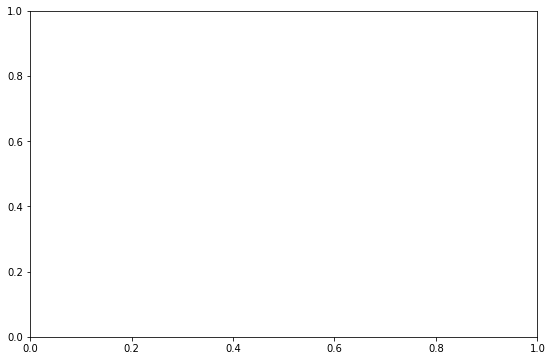

In [12]:
plt.rcParams["figure.figsize"] = (20,6)

drep = rep.loc[rep['from'].str.contains('regular'),:]     # only analysing target accounts direct tweets
ddem = dem.loc[dem['from'].str.contains('regular'),:]

plt.subplot(1,2,1)
dates = [matplotlib.dates.date2num(i) for i in drep['created_at_date_col']]
plt.plot_date(dates, drep['favorite_count'])
plt.yscale('log')
plt.xlabel('Tweet created date')
plt.ylabel('Number of favorites/likes')
plt.title('Democrat tweets')

plt.subplot(1,2,2)
dates = [matplotlib.dates.date2num(i) for i in ddem['created_at_date_col']]
plt.plot_date(dates, ddem['favorite_count'])
plt.yscale('log')
plt.xlabel('Tweet created date')
plt.ylabel('Number of favorites/likes')
plt.title('Republican tweets')

plt.show()

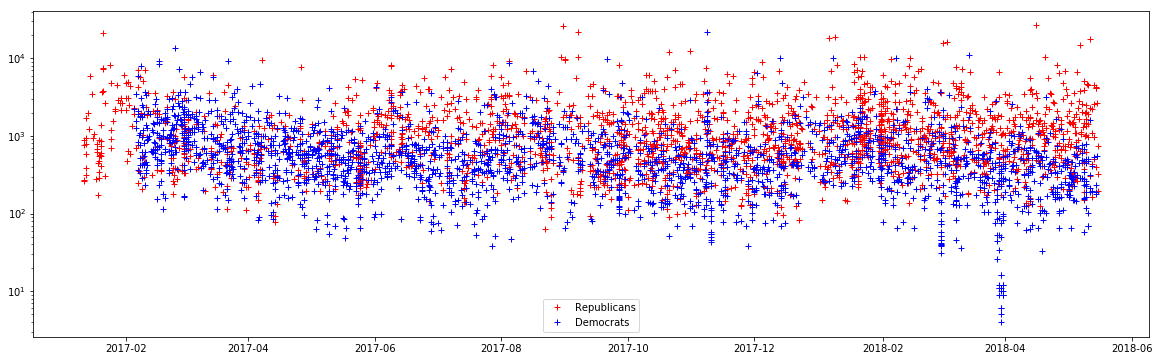

In [19]:
demdates = [matplotlib.dates.date2num(i) for i in ddem['created_at_date_col']]
repdates = [matplotlib.dates.date2num(i) for i in drep['created_at_date_col']]
plt.plot_date(repdates, drep['favorite_count'], 'r+', label='Republicans')
plt.plot_date(demdates, ddem['favorite_count'], 'b+', label='Democrats')
plt.yscale('log')
plt.legend(loc='lower center')
plt.ylabel('Number of favorites/likes (Log scale)')
plt.title('@GOP and @TheDemocrats tweets, Favorite Count vs Date')
plt.show()

Looking at the plots above it looks like both parties get most of their tweets to be favorited between 100 and 5000 times, although the democrats have some low performing (from a favorited perspective) in Apr 2018. Both parties are also fairly consistent in volumn of tweets through out the 2+ year data period. It looks like the republicans may have been getting a little more frequent. Lets look at the most favoirted few tweets from each account:

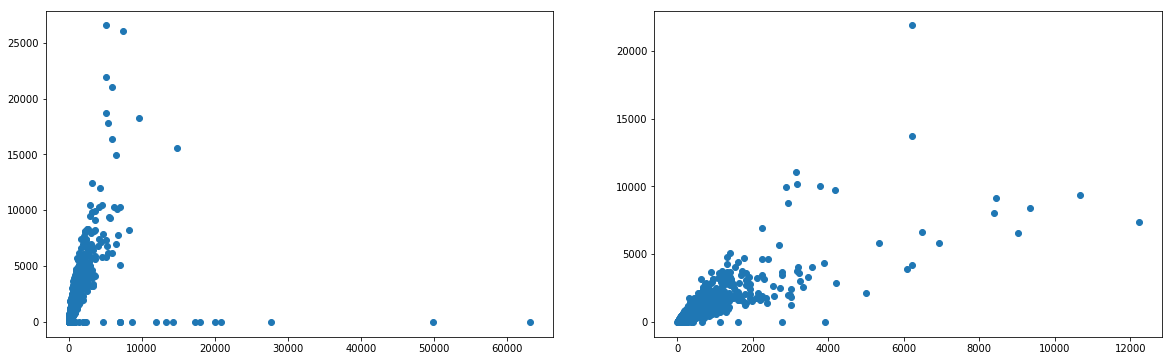

In [126]:
plt.subplot(1,2,1)
plt.scatter(drep['retweet_count'], drep['favorite_count'])
plt.xlabel('Number of times tweet was retweeted')
plt.ylabel('Number of favorites/likes')
plt.title('Republican tweets')

plt.subplot(1,2,2)
plt.scatter(ddem['retweet_count'], ddem['favorite_count'])
plt.xlabel('Number of times tweet was retweeted')
plt.ylabel('Number of favorites/likes')
plt.title('Democrat tweets')

plt.show()

** Text lengths **

looking at the distribution of the text lengths of the tweets

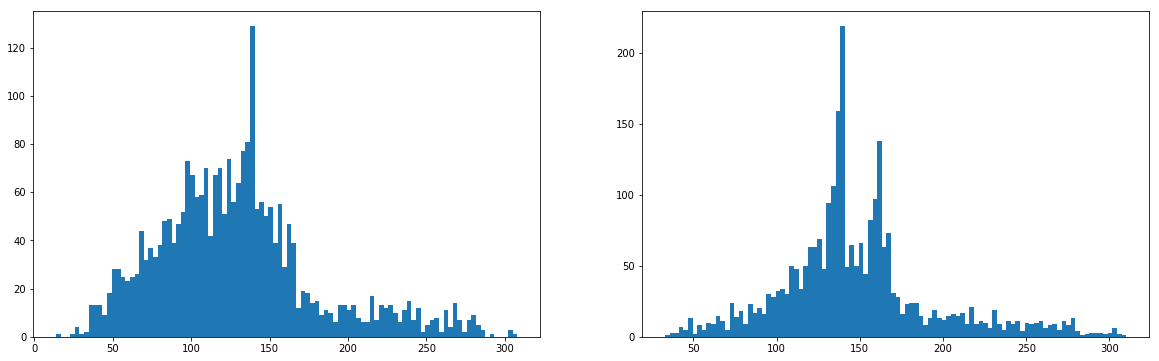

In [127]:
plt.rcParams["figure.figsize"] = (20,6)

rep['text_len'] = rep['text'].apply(len)
dem['text_len'] = dem['text'].apply(len)

plt.subplot(1,2,1)
plt.hist(rep['text_len'], bins=100)
plt.title('Republican tweets')

plt.subplot(1,2,2)
plt.hist(dem['text_len'], bins=100)
plt.title('Democrat tweets')

plt.show()